#**AUTOMATE DETECTION OF DIFFERENT SENTIMENTS FROM PARAGRAPHS USING RULE BASED LEARNING**

#**IMPORTING THE REQUIRED DEPENDENCIES**

In [21]:
# Importing the libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

#**LOADING THE DATASET**

In [ ]:
# MOUNTING THE GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Loading the Dataset
data = pd.read_csv('/content/drive/MyDrive/AUTOMATE_SENTIMENT/IMDB Dataset.csv')

#**ANALYSING THE DATASET**

In [9]:
# Printing the first five points from the data
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
# Printing the unique sentiments present in the data
data["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

In [11]:
# Printing the firts review along with its sentiment and lenght
print(data["review"][0])
print()
print(data["sentiment"][0])
len(data["review"][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

1761

#**DATA VISUALIZATION**

<ipython-input-43-e8bb0fc7dd69>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=data, palette={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'})


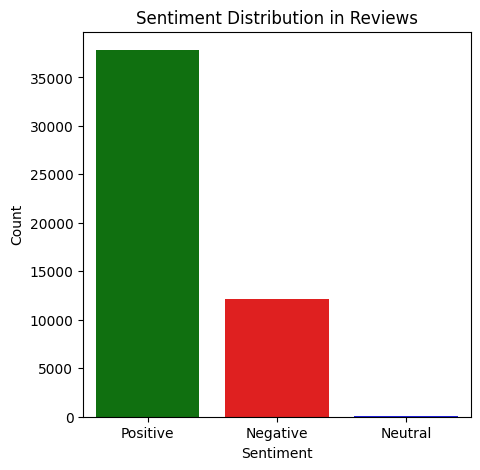

In [43]:
# CREATINNG SOME VISUALIZATION
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Function to get sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the reviews
data['sentiment'] = data['review'].apply(get_sentiment)

# Categorize sentiments
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_category'] = data['sentiment'].apply(categorize_sentiment)

# Plotting the bar chart using Seaborn
plt.figure(figsize=(5, 5))
sns.countplot(x='sentiment_category', data=data, palette={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'})
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution in Reviews')
plt.show()


#**TEXT PRE-PROCESSING**

In [13]:
# CONVERTING TEXT TO LOWERCASE
from string import punctuation
data['review'] = data['review'].str.lower()

In [15]:
# CREATING TRANSLATION TABLE TO REMOVE ALL THE PUNCTUATIONS
table = str.maketrans('', '', string.punctuation)
for i in range(len(data['review'])):
    data["review"][i] = data["review"][i].replace("<br />","").translate(table)

In [16]:
# LET'S HAVE A LOOK AT IT
data["review"][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

In [17]:
# CONVERTING NUMBER TO STRINGS
# INFLECT IS A LIBRARY TO CONVERT NUMBERS INTO ENGLISH WORDS
import inflect
p = inflect.engine()
for i in range(len(data['review'])):
    data["review"][i] =' '.join([str(p.number_to_words(((x)))) if x.isnumeric() else x for x in data["review"][i].split()])

In [20]:
# REMOVING STOPWORDS
stop_words = set(stopwords.words('english'))
print(stop_words)

{'ours', 'both', 'about', 'to', 'couldn', 'than', "isn't", "shouldn't", 'wasn', 'with', 'down', 'myself', 't', "haven't", "don't", 'all', 'yourselves', 'him', 'mustn', 'if', 'haven', 'you', 'was', 'each', 'ma', 's', 'being', 'only', "hadn't", 'now', 'been', 'and', 'until', 'a', 'yourself', 'did', 'very', 'here', 'd', 'any', 'theirs', 'why', 'same', 'nor', 'doesn', "couldn't", 'ourselves', 'does', "doesn't", 'that', 'or', 'just', 'once', 'm', "wouldn't", "mustn't", 'will', 'its', 'but', 'into', "won't", 'then', 'weren', 'it', 'am', 'few', "you've", 'doing', 'our', 'needn', 'we', "that'll", 'because', "mightn't", 'more', "hasn't", 'most', 'off', 'wouldn', "weren't", 'is', 'herself', 'by', 'those', 'should', 'whom', 'yours', 'of', 'not', "you'd", 'won', 'hers', 'as', 'above', "you'll", 'during', 'on', 'below', 'some', 'do', 'he', 'her', 'o', "wasn't", 'y', 've', 'didn', 'has', 'they', 'their', 'himself', 'for', 'so', 'shouldn', 'under', 'themselves', 'don', 'them', 'have', "she's", "didn'

In [22]:
# CHECKING THE DISTRIBUTION OF REVIEW LENGTHS
review_lens = Counter([len(x) for x in data["review"].values])
print("Zero-length reviews: {}".format(review_lens[0]))
print("Maximum review length: {}".format(max(review_lens)))
print('Number of reviews before removing outliers: ', len(data['review']))
zero_idx = [ii for ii, review in enumerate(data.review) if len(review)==0]
print(zero_idx,"index of review with 0 length")

Zero-length reviews: 0
Maximum review length: 13335
Number of reviews before removing outliers:  50000
[] index of review with 0 length


#**TOKENIZING**

In [24]:
# TOKENIZING THE WORDS
word_tokens = word_tokenize(data["review"][0])
filteres_review= [w for w in word_tokens if not w in stop_words]
print(filteres_review)

['one', 'reviewers', 'mentioned', 'watching', 'one', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'methe', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'moreso', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'awayi', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'wouldnt', 'dare', 'forget', 'pretty', 'pictures', 'painted', 'main

#**FREQUNECY DISTRIBUTION**

In [25]:
# COMPUTING THE FREQUNECY DISTRIBUTION OF TOKENS
from nltk.probability import FreqDist
fdist = FreqDist(filteres_review)
print('Sampling ', fdist)
print('The first 3 frequently used tokens are')
fdist.most_common(10)

Sampling  <FreqDist with 142 samples and 168 outcomes>
The first 3 frequently used tokens are


[('oz', 5),
 ('violence', 4),
 ('show', 3),
 ('prison', 3),
 ('forget', 3),
 ('one', 2),
 ('watching', 2),
 ('episode', 2),
 ('right', 2),
 ('first', 2)]

#**LABEL ENCODING**

In [26]:
# ENCODING THE LABELS
encoded = {"sentiment":{"positive": 1, "negative": 0}}

In [27]:
# REPLACING WITH ENCODED LABELS
data.replace(encoded, inplace=True)

In [28]:
# LOOKING AT FIRST FIVE SENTIMENT POINTS
data["sentiment"].head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

#**TFIDF VECTORIZER**

In [29]:
# TRANSFORMING THE TEXT USING TFIDF VECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2000, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(data.review).toarray()
labels = data.sentiment
features.shape

(50000, 323)

#**TRAIN-TEST SPLIT**

In [44]:
# SPLITTING THE DATASET INTO TRAIN AND TEST DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data["review"], data['sentiment'],test_size=0.3, random_state=42)

#**COUNT VECTORIZER**

In [ ]:
# USING COUNT VECTORIZER TO CONVERT NUMERICAL DATA INTO TEXT
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)


#**TFIDF TRANSFORMER**

In [31]:
# CONVERTING TEXT TO NUMERICAL REPRESENTATION
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


#**MODEL BUILDING**

#**MULTINOMIAL NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

#**EVALUATING/PREDICTIONS**

In [32]:
# MAKING PREDICTIONS
y_=clf.predict(count_vect.transform(X_test))

In [34]:
from sklearn.metrics import accuracy_score
print("test accuracy")
test_accuracy =accuracy_score(y_test, y_,normalize=True)
print(test_accuracy)

test accuracy
0.8346


##**Achived an accuracy of --------- 83 %**